6장 컨볼루션 신경망

In [18]:
# 예제 6.8 CNN 이미지 분류 CIFAR-10(텐서플로)

#셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 준비
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)   # 학습 데이터 shape 확인
print(x_test.shape, y_test.shape)     # 테스트 데이터 shape 확인

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


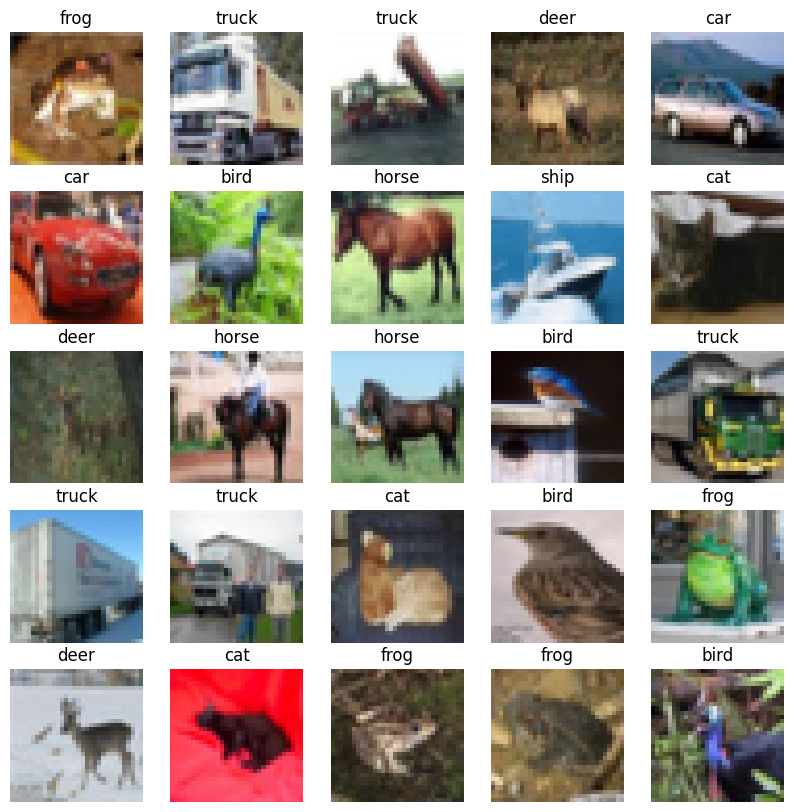

In [19]:
# 학습 데이터 시각화
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')

plt.show()

In [20]:
# 데이터 정규화
x_train, x_test = x_train / 255., x_test / 255.

In [21]:
# 모델 생성
model = Sequential(name='CIFAR10_CNN_Model')

# 특징 추출 신경망
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# 분류 신경망
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [22]:
# 모델 구조 요약
model.summary()

Model: "CIFAR10_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,986 (1.54 MB)

 Trainable params: 402,986 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# 모델 학습
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3)

history = model.fit(x_train, y_train, batch_size=32, epochs=50,
                    validation_split=0.2, verbose=0,
                    callbacks=early_stopping)

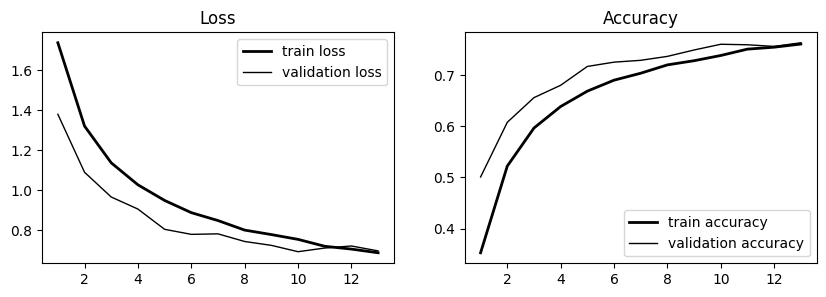

In [28]:
# 학습 결과 시각화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axs[0].plot(range(1, len(history.history['loss']) + 1),
            history.history['loss'], label='train loss',
            color='black', linewidth=2)
axs[0].plot(range(1, len(history.history['val_loss']) + 1),
            history.history['val_loss'], label='validation loss',
            color='black', linewidth=1)
axs[0].set_title('Loss')
axs[0].legend(loc='best')

axs[1].plot(range(1, len(history.history['accuracy']) + 1),
            history.history['accuracy'], label='train accuracy',
            color='black', linewidth=2)
axs[1].plot(range(1, len(history.history['val_accuracy']) + 1),
            history.history['val_accuracy'], label='validation accuracy',
            color='black', linewidth=1)
axs[1].set_title('Accuracy')
axs[1].legend(loc='best')

plt.show()

In [26]:
# 모델 평가
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.6919


[0.7092718482017517, 0.7578999996185303]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


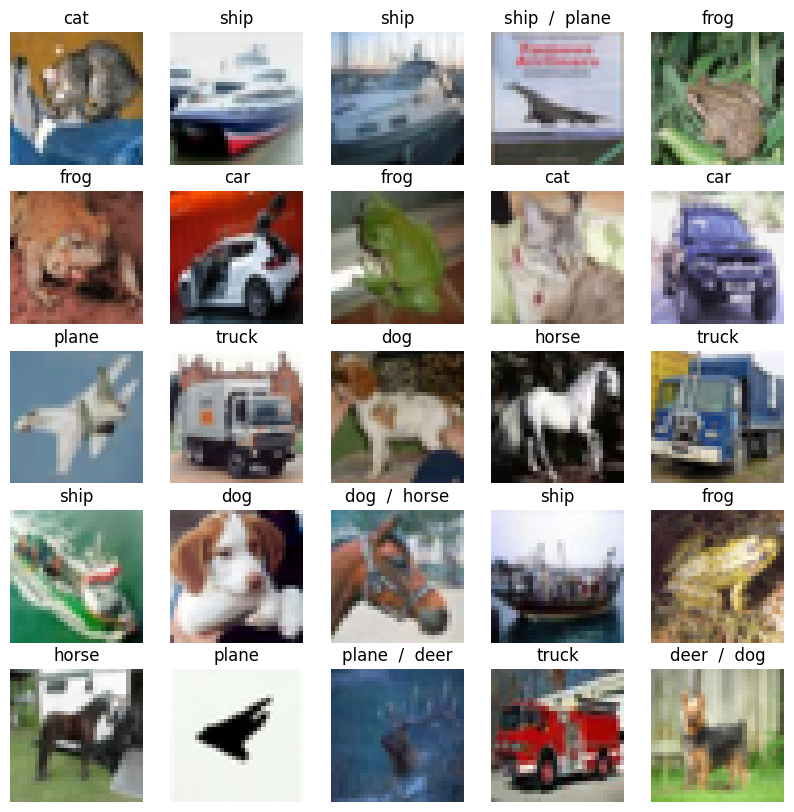

In [27]:
# 모델 예측 결과 시각화
x = x_test[:25]
y_pred = np.argmax(model.predict(x), axis=1)

plt.figure(figsize=(10 ,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    if y_pred[i] != y_test[i]:
        plt.title(class_names[y_pred[i].item()] + '  /  '
                 + class_names[y_test[i].item()])
    else:
        plt.title(class_names[y_pred[i].item()])
    plt.axis('off')

plt.show()

In [ ]:
# 예제 6.8 CNN 이미지 분류 CIFAR-10(파이토치)

#셋업
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.transforms import RandomHorizontalFlip
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 준비/전처리
transform = Compose([RandomHorizontalFlip(0.1),   # 수평 뒤집기
                     ToTensor(),   # 텐서로 변환
                     Normalize(mean=(0.4914, 0.4822, 0.4465),    # 표준화
                               std=(0.2470, 0.2435, 0.2616))])

train_data = CIFAR10(root='./', train=True,   # 학습 데이터 다운로드/전처리
                     download=True, transform=transform)
test_data = CIFAR10(root='./', train=False,  # 테스트 데이터 다운로드/전처리
                    download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 41148358.70it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
# 학습 데이터/검증 데이터 분할
train_data, valid_data = random_split(train_data, [0.8, 0.2])   # 분할 비율 0.2

# 데이터 로더 생성
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print(len(train_data))    # 학습 데이터 크기 확인
print(len(valid_data))    # 검증 데이터 크기 확인
print(len(test_data))   # 테스트 데이터 크기 확인

40000
10000
10000


In [ ]:
# 모델 생성
class Cifar10Model(nn.Module):   # Module 클래스 상속
    def __init__(self):
        super(Cifar10Model, self).__init__()
        self.feature_extractor = nn.Sequential(   # 특징 추출 신경망
            nn.Conv2d(3, 32, kernel_size=3, padding=1), # 입력 채널 수 3
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(   # 분류 신경망
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(128 * 4 * 4, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

# 디바이스 지정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Cifar10Model().to(device)

In [ ]:
# 학습 함수 정의
def train_step(model, optimizer, loss_fn, train_loader, device):
    model.train()   # 학습 모드
    train_loss = 0
    train_correct = 0

    for image, label in train_loader:
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()   # 그레디언트 초기화
        outputs = model(image)   # 출력 계산
        loss = loss_fn(outputs, label)   # 손실 계산

        loss.backward()   # 역전파
        optimizer.step()   # 최적화 수행

        predict = outputs.argmax(dim=1)   # 예측
        train_correct += (predict == label).sum().item()   # 정확한 예측
        train_loss += loss.item()   # 손실 누적값

    train_avg_loss = train_loss / len(train_loader)   # 학습 손실
    train_accuracy = train_correct / len(train_data)   # 학습 정확도
    return train_avg_loss, train_accuracy

# 검증 함수 정의
def validation_step(model, loss_fn, valid_loader, device):
    model.eval()   # 평가 모드
    valid_loss = 0
    valid_correct = 0

    with torch.no_grad():   # 자동 미분하지 않음
        for image, label in valid_loader:
            image, label = image.to(device), label.to(device)
            outputs = model(image)   # 출력 계산
            loss = loss_fn(outputs, label)   # 손실 계산

            predict = outputs.argmax(dim=1)   # 예측
            valid_correct += (predict == label).sum().item()   # 정확한 예측
            valid_loss += loss.item()   # 누적 손실값

    valid_avg_loss = valid_loss / len(valid_loader)   # 검증 손실
    valid_accuracy = valid_correct / len(valid_data)   # 검증 정확도
    return valid_avg_loss, valid_accuracy

In [ ]:
# 하이퍼파라미터 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# 모델 학습
epochs = 50   # 반복 횟수

patience = 3   # 조기 종료 조건
best_loss = np.inf   # 초기 손실값
counter = 0

train_losses = []   # 시각화 리스트
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(epochs):
    train_avg_loss, train_accuracy = train_step(model, optimizer, loss_fn,
                                                train_loader, device)
    train_losses.append(train_avg_loss)
    train_accuracies.append(train_accuracy)

    valid_avg_loss, valid_accuracy = validation_step(model, loss_fn,
                                                     valid_loader, device)
    valid_losses.append(valid_avg_loss)
    valid_accuracies.append(valid_accuracy)

    if valid_avg_loss < best_loss:   # 조기 종료 검사
        best_loss = valid_avg_loss
        counter = 0
    else:
        counter += 1

        if counter == patience:
            break

    print(f"Epoch {epoch+1}/{epochs} \t loss: {train_avg_loss:.4f}"
          f"\t accuracy: {train_accuracy:.4f} \t val_loss: {valid_avg_loss:.4f}"
          f"\t val_accuracy: {valid_accuracy:.4f}")

Epoch 1/50 	 loss: 1.6998	 accuracy: 0.3612 	 val_loss: 1.2711	 val_accuracy: 0.5279
Epoch 2/50 	 loss: 1.2869	 accuracy: 0.5340 	 val_loss: 1.0546	 val_accuracy: 0.6229
Epoch 3/50 	 loss: 1.1201	 accuracy: 0.6032 	 val_loss: 0.9401	 val_accuracy: 0.6693
Epoch 4/50 	 loss: 1.0207	 accuracy: 0.6384 	 val_loss: 0.8724	 val_accuracy: 0.6918
Epoch 5/50 	 loss: 0.9464	 accuracy: 0.6727 	 val_loss: 0.8323	 val_accuracy: 0.7067
Epoch 6/50 	 loss: 0.8907	 accuracy: 0.6898 	 val_loss: 0.7993	 val_accuracy: 0.7242
Epoch 7/50 	 loss: 0.8438	 accuracy: 0.7083 	 val_loss: 0.7451	 val_accuracy: 0.7397
Epoch 8/50 	 loss: 0.8101	 accuracy: 0.7231 	 val_loss: 0.7384	 val_accuracy: 0.7464
Epoch 9/50 	 loss: 0.7823	 accuracy: 0.7291 	 val_loss: 0.7307	 val_accuracy: 0.7522
Epoch 10/50 	 loss: 0.7567	 accuracy: 0.7399 	 val_loss: 0.7606	 val_accuracy: 0.7367
Epoch 11/50 	 loss: 0.7386	 accuracy: 0.7449 	 val_loss: 0.7336	 val_accuracy: 0.7480
Epoch 12/50 	 loss: 0.7186	 accuracy: 0.7509 	 val_loss: 0.7098

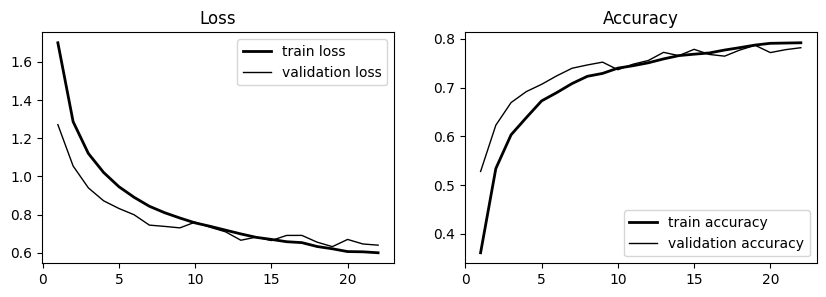

In [ ]:
# 학습 결과 시각화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axs[0].plot(range(1, len(train_losses) + 1), train_losses,
            label='train loss', color='black', linewidth=2)
axs[0].plot(range(1, len(valid_losses) + 1), valid_losses,
            label='validation loss', color='black', linewidth=1)
axs[0].set_title('Loss')
axs[0].set_xticks(range(0, epoch+2, 5))
axs[0].legend(loc='best')

axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies,
            label='train accuracy', color='black', linewidth=2)
axs[1].plot(range(1, len(valid_accuracies) + 1), valid_accuracies,
            label='validation accuracy', color='black', linewidth=1)
axs[1].set_title('Accuracy')
axs[1].set_xticks(range(0, epoch+2, 5))
axs[1].legend(loc='best')

plt.show()

In [ ]:
# 모델 평가
model.eval()  # 평가 모드
correct = 0

with torch.no_grad():   # 평가할 때는 그레디언트 계산하지 않음
    for image, label in test_loader:
        image, label = image.to(device), label.to(device)
        outputs = model(image)   # 출력 계산
        predict = outputs.argmax(dim=1)   # 예측
        correct += (predict == label).sum().item()   # 정확한 예측
    accuracy = correct / len(test_data)   # 정확도 계산

    print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7850


In [1]:
# 예제 6.14  VGG16 전이 학습/미세 조정 Cats_and_Dogs

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# 데이터셋 다운로드
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)
path = os.path.join(os.path.dirname(path_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(path, 'train')   # 학습 데이터 경로 지정
valid_dir = os.path.join(path, 'validation')   # 검증 데이터 경로 지정

print(os.listdir(train_dir))   # 하위 폴더 확인
print(os.listdir(valid_dir))

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
['cats', 'dogs']
['cats', 'dogs']


size of image: (500, 414)
shape of image: (414, 500, 3)


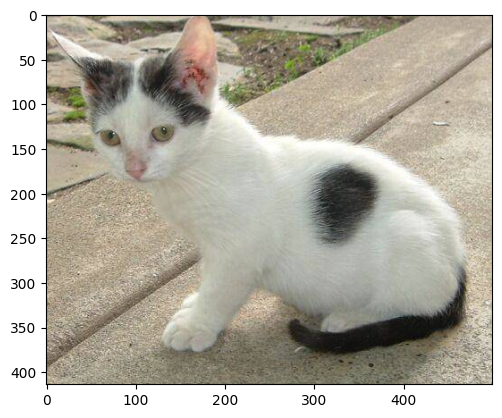

In [2]:
# 원본 이미지 확인
file_path = os.path.join(train_dir, 'cats', 'cat.3.jpg')   # 파일 경로

with Image.open(file_path) as img:
    print(f"size of image: {img.size}")   # 이미지 크기(가로x세로) 확인
    print(f"shape of image: {np.array(img).shape}")   # 이미지 shape 확인

    plt.imshow(img)   # 이미지 출력
    plt.show()

In [3]:
# 데이터 준비
train_ds = image_dataset_from_directory(train_dir, shuffle=True, batch_size=32,
                                        image_size=(160, 160))
valid_ds = image_dataset_from_directory(valid_dir, shuffle=True, batch_size=32,
                                        image_size=(160, 160))

print(len(train_ds))   # 학습 데이터 크기 확인
print(len(valid_ds))   # 검증 데이터 크기 확인

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
63
32


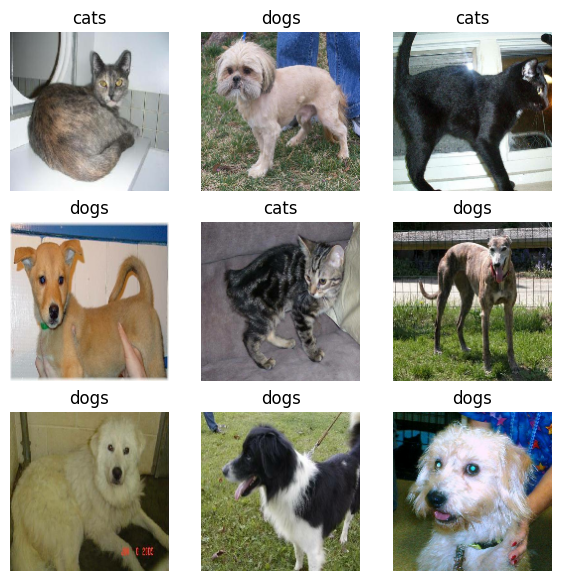

In [4]:
# 학습 데이터 시각화
class_name = train_ds.class_names   # 클래스명(cats, dogs)

for image, label in train_ds.take(1):   # 레이블(0, 1)
    plt.figure(figsize=(7, 7))

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i] / 255)
        plt.title(class_name[label[i]])
        plt.axis("off")

    plt.show()

In [5]:
# 검증/테스트 데이터 분할
valid_batch = len(valid_ds)
valid_ds = valid_ds.skip(valid_batch // 2)   # 분할 바율 0.5
test_ds = valid_ds.take(valid_batch // 2)

print(f"{len(valid_ds)}")   # 검증 데이터 확인
print(f"{len(test_ds)}")   # 테스트 데이터 확인

16
16


In [6]:
# 데이터 증강
image_augment = Sequential([
    RandomFlip('horizontal'),   # 수평 뒤집기
    RandomRotation(0.2),   # 회전
    RandomZoom(0.3)   # 확대
])

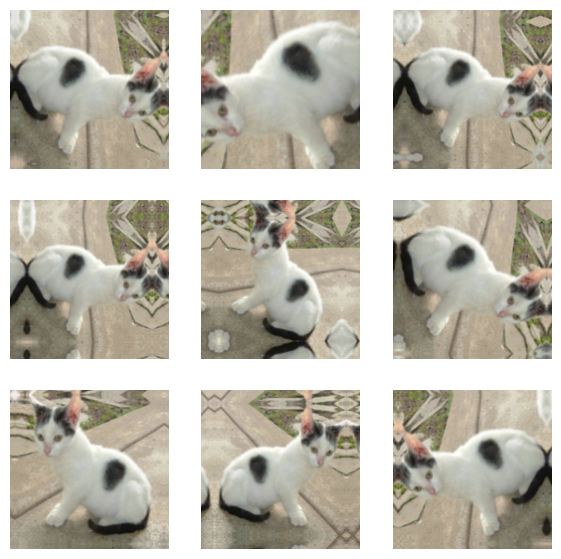

In [7]:
# 데이터 증강 시각화
img = img.resize((160, 160))

plt.figure(figsize=(7, 7))

for i in range(9):
    augmented_image = image_augment(tf.expand_dims(img, 0))
                                # (batch_size, height, width, channels)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

plt.show()

In [8]:
# VGG16 베이스 모델 생성
base_model = VGG16(include_top=False,   # 분류 신경망 포함하지 않음
                   weights='imagenet',   # ImageNet으로 학습한 가중치
                   input_shape=(160, 160, 3))
base_model.trainable = False   # 베이스 모델 동결

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 160, 160, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 160, 160, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 80, 80, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 40, 40, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 40, 40, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 40, 40, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 20, 20, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 20, 20, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 20, 20, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# 모델 생성
inputs = Input(shape=(160, 160, 3))
x = image_augment(inputs)   # 데이터 증강
x = preprocess_input(x)   # 정규화
x = base_model(x)   # VGG16 베이스 모델
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)   # 은닉층 뉴런 128개
x = Dropout(0.5)(x)   # 드롭아웃 비율 0.5
outputs = Dense(1, activation='sigmoid')(x)   # 출력층 뉴런 1개

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 160, 160, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 160, 160)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 160, 160)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 160, 160)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 160, 160, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 160, 160, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 5, 5, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         65,664 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# 모델 학습
history = model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.6919 - loss: 2.1060 - val_accuracy: 0.9672 - val_loss: 0.1250
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.8711 - loss: 0.4283 - val_accuracy: 0.9713 - val_loss: 0.0774
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.8938 - loss: 0.2767 - val_accuracy: 0.9611 - val_loss: 0.0943
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9143 - loss: 0.2148 - val_accuracy: 0.9652 - val_loss: 0.0865
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.8914 - loss: 0.2424 - val_accuracy: 0.9611 - val_loss: 0.0754
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9050 - loss: 0.2160 - val_accuracy: 0.9754 - val_loss: 0.0583
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.9169 - loss: 0.1901 - val_accuracy: 0.9754 - val_loss: 0.0864
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9290 - loss: 0.1764 - val_accuracy

In [12]:
# 베이스 모델 동결 해제
base_model.trainable = True   # 동결 해제

print(len(base_model.layers))   # 베이스 모델 계층 수 확인

for layer in base_model.layers[:-4]:   # block5 제외하고 동결
    layer.trainable = False

19


In [13]:
# 파인 튜닝 모델 컴파일(학습률 감소)
model.compile(optimizer = Adam(learning_rate=1e-5),
              loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# 파인 튜닝 모델 학습 콜백 활용
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'transfer_learning_vgg16.keras', save_best_only=True)

history_fine = model.fit(train_ds, batch_size=32, epochs=10,
                         validation_data=valid_ds, verbose=0,
                         callbacks=checkpoint)

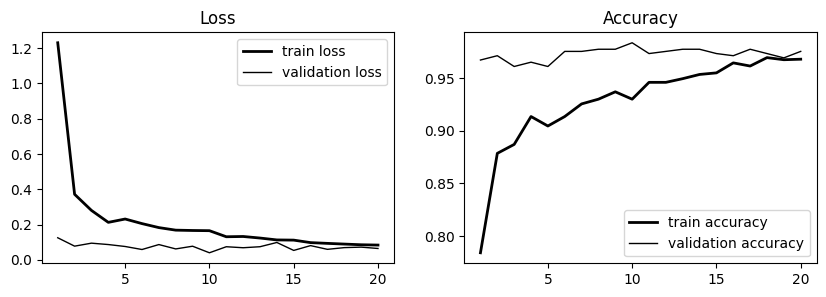

In [15]:
# 학습 결과 시각화
history.history['loss'] += history_fine.history['loss']
history.history['val_loss'] += history_fine.history['val_loss']
history.history['accuracy'] += history_fine.history['accuracy']
history.history['val_accuracy'] += history_fine.history['val_accuracy']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axs[0].plot(range(1, len(history.history['loss']) + 1),
            history.history['loss'], label='train loss',
            color='black', linewidth=2)
axs[0].plot(range(1, len(history.history['val_loss']) + 1),
            history.history['val_loss'], label='validation loss',
            color='black', linewidth=1)
axs[0].set_title('Loss')
axs[0].legend(loc='best')

axs[1].plot(range(1, len(history.history['accuracy']) + 1),
            history.history['accuracy'], label='train accuracy',
            color='black', linewidth=2)
axs[1].plot(range(1, len(history.history['val_accuracy']) + 1),
            history.history['val_accuracy'], label='validation accuracy',
            color='black', linewidth=1)
axs[1].set_title('Accuracy')
axs[1].legend(loc='best')

plt.show()

In [16]:
# 모델 평가
model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9842 - loss: 0.0535


[0.05933915823698044, 0.9795082211494446]

Prediction: 
 [0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1]
Label: 
 [0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1]


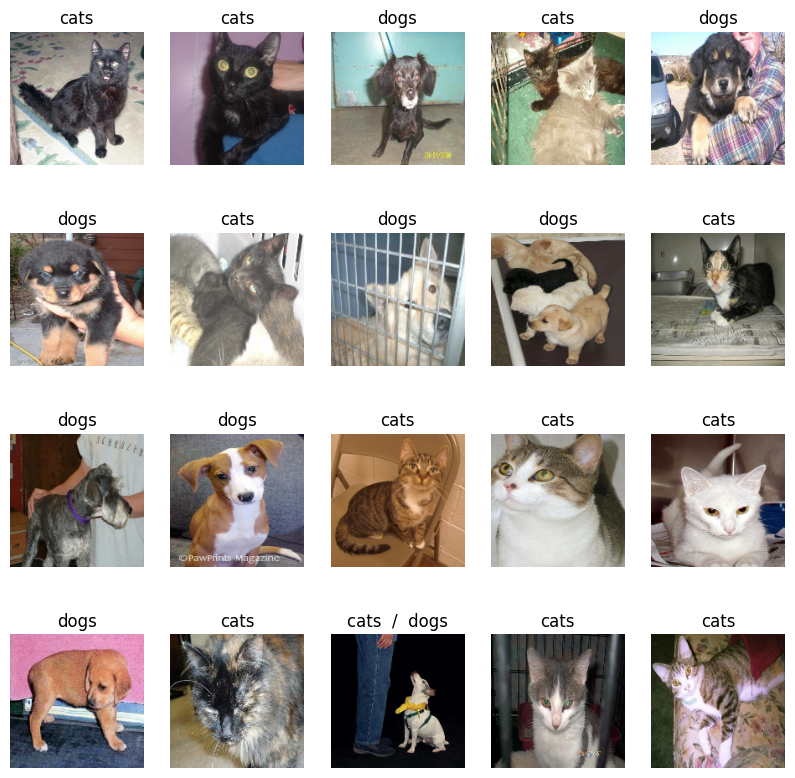

In [17]:
# 모델 예측 결과 시각화
image, label = next(iter(test_ds))        # 이터레이터 사용하여 배치 가져옴
prediction = model.predict_on_batch(image).reshape(-1)   # 배치 단위로 예측
predict = (prediction >= 0.5).astype(int)   # 임계치 0.5

print(f"Prediction: \n {predict}")
print(f"Label: \n {label}")

plt.figure(figsize=(10, 10))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i] / 255)
    if predict[i] != label[i]:
        plt.title(class_name[predict[i]] + '  /  '
                  + class_name[label[i]])
    else:
        plt.title(class_name[predict[i]])
    plt.axis('off')
plt.show()